## Problem 1

For a separable Hamiltonian system,

$$H(p,q) = T(p)+V(q),\quad p,q\in \mathbb{R}^d$$

with corresponding Hamiltonian equation

$$p'(t)=-\nabla_q V(q),\quad q'(t)=\nabla_p T(p),$$


prove that the symplectic Euler method 

$$
\begin{split}
p_{n+1} &= p_n - \Delta t \nabla_q V(q_n),\\
q_{n+1} &= q_n + \Delta t \nabla_p T(p_{n+1}),
\end{split}
$$

is 

a) an order 1 method.

b) a symplectic method.

Hint: 

Try to prove
$$
\Phi_{n+1}^{\top} J \Phi_{n+1}=\Phi_{n}^{\top} J \Phi_{n}.
$$

A useful fact is that for any symmetric matrix $X\in \mathbb{R}^{d\times d}$,

$$  \begin{pmatrix}
I & 0\\
X & I
\end{pmatrix}^T J  \begin{pmatrix}
I & 0\\
X & I
\end{pmatrix} = J, \quad  \begin{pmatrix}
I & X\\
0 & I
\end{pmatrix}^T J  \begin{pmatrix}
I & X\\
0 & I
\end{pmatrix} = J.
\tag{SymFact}
$$

**Solution**
(a) Order 1 method:
We start by performing Taylor expansion on the exact solution $p(t)$:
\begin{equation}
    p(t_{n+1}) = p(t_n) + hp'(t_n) + O(h^2) \\
    = p(t_n) -h\nabla_q V(q(t_n)) + O(h^2)
\end{equation} where $h = \Delta t$.

Then for the $p$ component, we have its local truncation error:
$$
    \tau^{(p)}_{n+1} = p(t_{n+1}) - p_{n+1} \\
    = p(t_n) -h\nabla_q V(q(t_n)) + O(h^2) - p_n + h\nabla_qV(q_n) = O(h^2)
$$

We also Taylor expand on the exact solution $q(t)$:
\begin{equation}
    q(t_{n+1}) = q(t_n) + hq'(t_n) + O(h^2) \\
    = q(t_n) + h \nabla_p T(p(t_n)) + O(h^2)
\end{equation}

Our scheme in the $q$ component is:
$$
    q_{n+1} = q_n + h \nabla_p T(p_{n+1})
$$
Since we have the dependence on $p_{n+1}$, we can Taylor expand the gradient to obtain:
$$
    \nabla_p T(p_{n+1}) = \nabla_p T(p_n) + h \nabla^2_p T(p_n) + O(h^2)
$$

Then our scheme can be written as:
$$
    q_{n+1} = q_n + h \nabla_p T(p_n) + h^2 \nabla^2_p T(p_n) + O(h^3) = q_n + h \nabla_p T(p_n) + O(h^2)
$$. Then we can consider the local truncation error:
$$
    \tau^{q}_{n+1} = q(t_{n+1}) - q_{n+1} \\ 
    = q(t_n) + h \nabla_p T(p(t_n)) + O(h^2) - q_n - h \nabla_p T(p_n) - O(h^2) = O(h^2)
$$.

Since the local truncation error is $O(h^2)$ in both components, we have that the scheme is first order.

(b) A symplectic method:

We have the scheme:
$$
\begin{split}
p_{n+1} &= p_n - h \nabla_q V(q_n),\\
q_{n+1} &= q_n + h \nabla_p T(p_{n+1}),
\end{split}
$$
Let the flow be $\phi = \begin{pmatrix} p \\ q \end{pmatrix}$. Then we have:

We can rewrite the scheme:
$$
    \phi_{n+1} = \phi_n + h\begin{pmatrix} -\nabla_q V(q_n) \\ \nabla_p T(p_{n+1} )\end{pmatrix}
$$

We also obtain:
$$
    \Phi_{n+1} = \frac{ \partial \phi_{n+1} }{ \partial \phi_0 } = 
    \begin{pmatrix}
        \frac{\partial p_{n+1}}{\partial p_0} && \frac{\partial p_{n+1}}{\partial q_0} \\
        \frac{\partial q_{n+1}}{\partial p_0} && \frac{\partial q_{n+1}}{\partial q_0}
    \end{pmatrix}
$$ where $\phi_0 = (p_0, q_0)^T$.

For the equation:
$$
    \phi_{n+1} = \phi_n + h\begin{pmatrix} -\nabla_q V(q_n) \\ \nabla_p T(p_{n+1} )\end{pmatrix}
$$
We can eliminate the implicit $p_{n+1}$ dependence by substituting:
$$
    p_{n+1} = p_n - h \nabla_q V(q_n)
$$ and therefore obtain:
$$
    \phi_{n+1} = \phi_n + h\begin{pmatrix} -\nabla_q V(q_n) \\ \nabla_p T(p_n - h \nabla_q V(q_n)) \end{pmatrix}
$$

Therefore we take the partial derivative with respect to $\phi_0$, for the scheme, we obtain:
$$
    \Phi_{n+1} = \Phi_{n} + h 
    \begin{pmatrix}
    -\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial p_0} 
    && -\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial q_0} \\
    \nabla^2 T(p_n - h\nabla V(q_n)) \cdot (\frac{\partial p_n}{\partial p_0} - h\nabla^2V(q_n) 
    \cdot \frac{\partial q_n}{\partial p_0}
    )
    &&
    \nabla^2 T(p_n - h\nabla V(q_n)) \cdot (\frac{\partial p_n}{\partial q_0} - h\nabla^2V(q_n) 
    \cdot \frac{\partial q_n}{\partial q_0}
    )
    \end{pmatrix} \\
    = 
    \begin{pmatrix}
        \frac{\partial p_n}{\partial p_0} && \frac{\partial p_n}{\partial q_0} \\
        \frac{\partial q_n}{\partial p_0} && \frac{\partial q_n}{\partial q_0}
    \end{pmatrix}
    + \begin{pmatrix}
    -h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial p_0} && -h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial q_0} \\
    h\nabla^2 T(p_n - h\nabla V(q_n)) \cdot (\frac{\partial p_n}{\partial p_0} - h\nabla^2V(q_n) 
    \cdot \frac{\partial q_n}{\partial p_0}) && h\nabla^2 T(p_n - h\nabla V(q_n)) \cdot (\frac{\partial p_n}{\partial q_0} - h\nabla^2V(q_n) \cdot \frac{\partial q_n}{\partial q_0})
    \end{pmatrix}
$$

$$
    =
    \begin{pmatrix}
        \frac{\partial p_n}{\partial p_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial p_0} &&
        \frac{\partial p_n}{\partial q_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial q_0} \\
        \frac{\partial q_n}{\partial p_0} + h\nabla^2 T(p_n - h\nabla V(q_n)) \cdot (\frac{\partial p_n}{\partial p_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial p_0}) &&
        \frac{\partial q_n}{\partial q_0} + h\nabla^2 T(p_n - h\nabla V(q_n)) \cdot (\frac{\partial p_n}{\partial q_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial q_0})
    \end{pmatrix}
    =
    \begin{pmatrix}
        \frac{\partial p_n}{\partial p_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial p_0} &&
        \frac{\partial p_n}{\partial q_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial q_0} \\
        \frac{\partial q_n}{\partial p_0} + h\nabla^2 T(p_{n+1}) \cdot (\frac{\partial p_n}{\partial p_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial p_0}) &&
        \frac{\partial q_n}{\partial q_0} + h\nabla^2 T(p_{n+1}) \cdot (\frac{\partial p_n}{\partial q_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial q_0})
    \end{pmatrix}
$$ for simplicity.

Then:
$$
\Phi_{n+1}^T J \Phi_{n+1} \\
= 
\begin{pmatrix}
        \frac{\partial p_n}{\partial p_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial p_0} &&
        \frac{\partial q_n}{\partial p_0} + h\nabla^2 T(p_{n+1}) \cdot (\frac{\partial p_n}{\partial p_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial p_0}) \\
        \frac{\partial p_n}{\partial q_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial q_0}
         &&
        \frac{\partial q_n}{\partial q_0} + h\nabla^2 T(p_{n+1}) \cdot (\frac{\partial p_n}{\partial q_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial q_0})
    \end{pmatrix} \cdot
\begin{pmatrix}
    0 && I \\
    -I && 0
\end{pmatrix} \cdot
\begin{pmatrix}
        \frac{\partial p_n}{\partial p_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial p_0} &&
        \frac{\partial p_n}{\partial q_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial q_0} \\
        \frac{\partial q_n}{\partial p_0} + h\nabla^2 T(p_{n+1}) \cdot (\frac{\partial p_n}{\partial p_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial p_0}) &&
        \frac{\partial q_n}{\partial q_0} + h\nabla^2 T(p_{n+1}) \cdot (\frac{\partial p_n}{\partial q_0} - h\nabla^2 V(q_n) \cdot \frac{\partial q_n}{\partial q_0})
    \end{pmatrix}
$$

$$
= J =
\begin{pmatrix}
    \frac{\partial p_n}{\partial p_0} && \frac{\partial q_n}{\partial p_0} \\
    \frac{\partial p_n}{\partial q_0} && \frac{\partial q_n}{\partial q_0}
\end{pmatrix} \cdot
\begin{pmatrix}
    0 && I \\
    -I && 0
\end{pmatrix} \cdot
\begin{pmatrix}
    \frac{\partial p_n}{\partial p_0} && \frac{\partial p_n}{\partial q_0} \\
    \frac{\partial q_n}{\partial p_0} && \frac{\partial q_n}{\partial q_0}
\end{pmatrix} = \Phi_n^T J \Phi_n
$$ after cancellation of the second terms involving $h$.

## Problem 2

Prove that the 1st stage Gauss-Legendre method is symplectic.

Hint:

The Gauss-Legendre method is for Hamiltonian system is
$$
\begin{align*}k_{n}=&f\left(u_{n}+\frac{1}{2} h k_{n}\right)=J^{-1} \nabla H\left(u_{n}+\frac{1}{2} h k_{n}\right),\\u_{n+1}=&u_{n}+h k_{n}\end{align*}
$$
You should consider both derivatives 


$$
\Phi_{n}=\frac{\partial u_{n}}{\partial u_{0}}, \quad \Xi_{n}=\frac{\partial k_{n}}{\partial u_{0}}.
$$

You can also assume that 
$$
G_n= \nabla^{2} H\left(u_{n}+\frac{h}{2} k_{n}\right)
$$
is invertible. 
Then try to prove
$$
\Phi_{n+1}^{\top} J \Phi_{n+1}=\Phi_{n}^{\top} J \Phi_{n}.
$$

Given the above formulation, we have:
\begin{equation}
    \Xi_n = J^{-1}\nabla^2 H(u_n + \frac{1}{2}hk_n) (\Phi_n + \frac{1}{2} h \Xi_n) \\
    \Phi_{n+1} = \Phi_{n} + h\Xi_n
\end{equation}

To eliminate the implicit $\Xi$ term, we can observe:
$$
    \Xi_n = J^{-1}G_n (\Phi_n + \frac{1}{2} h \Xi_n) = J^{-1}G_n\Phi_n + \frac{1}{2}hJ^{-1}\Xi_n \\
$$ can calculate $\Phi_n$ explicitly in terms of $\Xi_n$.
$$
    \Xi_n = J^{-1}G_n\Phi_n + \frac{1}{2}hJ^{-1}G_n\Xi_n \\
    J^{-1}G_n\Phi_n = \Xi_n - \frac{1}{2}hJ^{-1}G_n\Xi_n \\
    G_n\Phi_n = J\Xi_n - \frac{1}{2}hG_n\Xi_n \\
    \Phi_n = G^{-1}_n J \Xi_n - \frac{1}{2}h \Xi_n
$$

Proving symplectic, we consider:
$$
    \Phi_{n+1}^T J \Phi_{n+1} = (\Phi_{n} + h\Xi_n)^T J (\Phi_{n} + h\Xi_n) \\
    = (\Phi_{n}^T + h\Xi_n^T) J (\Phi_{n} + h\Xi_n)
$$
Simply matrix multiply and distribute:
$$
    (\Phi_{n}^T + h\Xi_n^T) J (\Phi_{n} + h\Xi_n) = 
        \Phi_n^T J \Phi_n +
        h\Phi_n^T J \Xi_n +
        h\Xi_n^T J \Phi_n +
        h^2 \Xi_n^T J \Xi_n
$$ here since $G_n$ is invertible, $G_n^{-1}$ is defined. We substitute $\Phi_n$ in the second and third term.
$$
(\Phi_{n}^T + h\Xi_n^T) J (\Phi_{n} + h\Xi_n) \\
= \Phi_n^T J \Phi_n + h(G_n^{-1} J \Xi_n - \frac{1}{2}h\Xi_n)^T J \Xi_n + 
  h\Xi_n^T J (G_n^{-1} J \Xi_n - \frac{1}{2} h \Xi_n) +
  h^2 \Xi_n^T J \Xi_n
$$
Here we consider several properties:
(1) The Hessian $G_n$ is symmetric: thus $G_n^{-1} = G_n$.
(2) $J^T = -J$.
(3) $(ABC)^T = (C^TB^TA^T)$

Using these properties, we can see:
$$
  \Phi_n^T J \Phi_n + h(G_n^{-1} J \Xi_n - \frac{1}{2}h\Xi_n)^T J \Xi_n + 
  h\Xi_n^T J (G_n^{-1} J \Xi_n - \frac{1}{2} h \Xi_n) +
  h^2 \Xi_n^T J \Xi_n \\ 
  = 
  \Phi_n^T J \Phi_n + 
  h((G_n^{-1})^{T} J^T \Xi_n^T - \frac{1}{2}h \Xi_n^T) J \Xi_n +
  h\Xi_n^T J G_n^{-1} J \Xi_n - \frac{1}{2}h^2 \Xi_n^T J \Xi_n +
  h^2 \Xi_n^T J \Xi_n \\
  = \Phi_n^T J \Phi_n + h(\Xi_n^T (-J) G_n^{-1} - \frac{1}{2}h\Xi_n^T) J \Xi_n +
  h\Xi_n^T J (G_n^{-1} J \Xi_n - \frac{1}{2} h \Xi_n) + h^2 \Xi_n^T J \Xi_n \\
  = \Phi_n^T J \Phi_n - h \Xi_n^T J G_n^{-1} J \Xi_n - \frac{1}{2}h^2 \Xi_n^T J \Xi_n +
  h \Xi_n^T J G_n^{-1} J \Xi_n - \frac{1}{2}h^2 \Xi_n^T J \Xi_n + h^2 \Xi_n^T J \Xi_n
$$
It is easily seen that term 2 cancels with term 4, and term 3, term 5 cancels with term 6, leaving our result:
$$
    \Phi_{n+1}^T J \Phi_{n+1} = \Phi_{n}^T J \Phi_{n}
$$ therefore the method is symplectic.

## Problem 3


Derive the Butcher table for the 2-step Gauss-Legendre method, starting from the roots of the Legendre polynomial $P_2(x)$. 

Consider the collocation method:
$$
    u_{n+1} = u_n + \int_{t_n}^{t_{n+1}} u'(s)ds
$$
Given:
$$
    u_{n+1} = u(t_{n+1}) \\
    u_{n} = u(t_n) \\
    u'(t_n + c_j h) = f(u(t_n + c_j h)) 
$$

The quadrature arises from approximating $f(u(t_n + c_j h)) $ at points $c_1, c_2, \dots, c_v$, choosing $v$ parameters to "collocate". Here in our case $v=2$. We can construct a quadrature to compute the integral part. in this case, we use Gauss Legendre polynomial $P_2(t)$ to compute the parameters $c_j$, matching points at $x_n + c_1h, x_n + c_2h$.
$\int_{t_n}^{t_{n+1}} u'(s) ds\approx \int_{t_n}^{t_{n+1}} \sum_{i=1}^2 p_i(s) u'(t_n + c_i h)ds$ where $p_iu'(t_n + c_i h)$ is the Lagrange polynomial interpolating $u'$ at $t_n + c_ih$ for $i=1,2$ and $u'(t_n + c_i h)$ is an exact value. 

Specifically, the Lagrange polynomials should satisfy: $p_j(t_n + c_ih) = \delta_{ij}$. Therefore we obtain:
$$
    p_i = \frac{t - c_j}{c_i - c_j} (i \neq j; i,j = 1, 2)
$$

We can rewrite:
$$
    u_{n+1} = u_n + \int_{t_n}^{t_{n+1}} u'(s)ds \\
    = u_n + \int_{t_n}^{t_{n+1}} \sum_{i=1}^2 p_i(s) u'(t_n + c_i h) ds \\
    = u_n + \int_{t_n}^{t_{n+1}} \sum_{i=1}^2 p_i(s) f(u(t_n + c_i h)) ds \\
    = u_n + h \sum_{i=1}^2 f(u(t_n + c_i h)) \int_0^1 p_i(s) ds
$$ by using $t_{n+1} = t_n + h$.

To rebuild the RK method, we compare it with the above formulation.
For the RK method:
$$
    k_j = u_n + h\sum_{i=1}^2 a_{j,i} f(t_n+c_ih) \\
    u_{n+1} = u_n + \sum_{j=1}^2 b_j f(t_n+c_jh)
$$
This is formulated by letting $k_j$ ($j=1,2$) be equal to $u(t_n + c_jh)$, and finally taking a full step aggregating all $k_j$'s. In general, the whole solution can also be expressed as:
$$
    u(t) = u_n + \int_{t_n}^t \sum_{i=1}^2 f(u(t_n + c_ih)) p_i(s)ds \\
    = u_n + h \sum_{i=1}^2 f(u(t_n + c_ih)) \int_0^\frac{{t-t_n}}{h} p(s) ds
$$ by using the fact $t_{n+s} =t_n + sh$;

Compactly, we have:
$$
    a_{j,i} = \int_{0}^{c_j} p_i(s) ds \\
    b_j = \int_0^1 p_i(s) ds
$$ by the above formulation and $a_{j,i}$ are related to $k_j$ the "intermediate" steps, whereas $b_j$ represents the weights in a full step.

Consider the Legendre polynomial $P_2(x) = \frac{1}{2}(3x^2 - 1)$. However, this is formulated on the interval $(-1, 1)$, performing a linear transformation is necessary for finding $c_1, c_2$ on the interval $(0, 1)$. We do so by applying the transformation: $x \leftarrow 2x - 1$, then:
$$
    \tilde{P}_2(x) = P_2(2x-1) = \frac{1}{2}(3(2x-1)^2 - 1) = \frac{1}{2}(12x^2-12x+2) = 6x^2 - 6x + 1 = 0
$$
Yielding the roots: $c_1 = \frac{1}{2} - \frac{\sqrt{3}}{6}$ and $c_2 = \frac{1}{2} + \frac{\sqrt{3}}{6}$. 
Applying the formula:
$$
    a_{j,i} = \int_{0}^{c_j} p_i(s) ds \\
    b_j = \int_0^1 p_i(s) ds
$$ where:
$$
    p_1 = -\frac{t - (\frac{1}{2} + \frac{\sqrt{3}}{6})}{\frac{\sqrt{3}}{3}}
$$
and
$$
    p_2 = \frac{t - (\frac{1}{2} - \frac{\sqrt{3}}{6})}{\frac{\sqrt{3}}{3}}
$$

Integrate, we obtain:
$$
\mathbf{A} = 
\begin{pmatrix}
    a_{1,1} && a_{1,2}\\
    a_{2,1} && a_{2,2}
\end{pmatrix}
=
\begin{pmatrix}
    \frac{1}{4} && \frac{1}{4} - \frac{\sqrt{3}}{6}\\
    \frac{1}{4} + \frac{\sqrt{3}}{6} && \frac{1}{4}
\end{pmatrix}
$$ and
$$
\mathbf{b}^T = 
\begin{pmatrix}
    \frac{1}{2} && \frac{1}{2}
\end{pmatrix}
$$
And since that collocation-based RK methods always satisfy Kutta condition, we can easily calculate $\mathbf{c}$.
$$
\mathbf{c} =
\begin{pmatrix}
    a_{1,1} + a_{1,2} \\
    a_{2,1} + a_{2,2}
\end{pmatrix} =
\begin{pmatrix}
    \frac{1}{2} - \frac{\sqrt{3}}{6} \\
    \frac{1}{2} + \frac{\sqrt{3}}{6}
\end{pmatrix}
$$

Thus the Butcher array is rebuilt:
$$
\begin{array}{c|cc}\frac{1}{2} - \frac{\sqrt{3}}{6} &\frac{1}{4} & \frac{1}{4} - \frac{\sqrt{3}}{6}\\  \frac{1}{2} + \frac{\sqrt{3}}{6} &\frac{1}{4} + \frac{\sqrt{3}}{6} & \frac{1}{4}\\ \hline & \frac{1}{2} & \frac{1}{2} \end{array}
$$

## Problem 4


Consider two atoms with Lennard-Jones interaction

$$
V(x_1,x_2)=w(|x_1-x_2|),\quad w(r)=0.01\left(\frac{1}{r^{12}}-\frac{1}{r^6}\right).
$$

a) Use the 1-step (2nd order) Gauss-Legendre method to solve the Hamiltonian system

$$
x_1''(t) = -\nabla_{x_1} V(x_1,x_2), \quad x_2''(t) = -\nabla_{x_2} V(x_1,x_2),
$$

with initial condition

$$
x_1(0) = 0.7,\quad x_2(0)=-0.7, \quad \dot{x}_1(0)=\dot{x}_2(0)=0.0.
$$

Use time step $h=0.2$ on the time interval $[0,50.0]$. Plot the distance $x_1(t)-x_2(t)$ along the trajectory, and plot the energy along the trajectory
$$
E(t)=\frac12 (x_1'(t))^2 + \frac12 (x_2'(t))^ 2 + V(x_1(t),x_2(t)).
$$

You can use any solver to solve the nonlinear equation (but you have to code from scratch)

Derivations:
Let $\mathbf{x} = (x_1, x_2)^T$, and $\mathbf{v} = \mathbf{\dot{x}} = (\dot{x_1}, \dot{x_2})^T$.
Then we have the ODE system:
$$
\begin{pmatrix}
    \dot{x} \\
    \dot{v}
\end{pmatrix} =
\begin{pmatrix}
    v \\
    -\nabla_{\mathbf{x}}V(x)
\end{pmatrix}
$$ with initial conditions:
$$
\begin{pmatrix}
    x(0) \\
    v(0)
\end{pmatrix} = 
\begin{pmatrix}
    0.7 \\
    -0.7 \\
    0.0 \\
    0.0
\end{pmatrix}
$$

We have
$$
    \nabla_{\mathbf{x}}V(x) =
    \begin{pmatrix}
        \nabla_{x_1} V(x) \\
        \nabla_{x_2} V(x)
    \end{pmatrix} =
    \begin{pmatrix}
        \frac{1}{100} (-12(x_1 - x_2)^{-13} + 6(x_1 - x_2)^{-7}) \\
        \frac{1}{100} (12(x_1 - x_2)^{-13} - 6(x_1 - x_2)^{-7})
    \end{pmatrix}
$$

We have the one step Gauss-Legendre method (there are no $t_n$ dependence):
$$
\begin{array}{c|cc} \frac{1}{2}&  \frac{1}{2}\\ \hline & 1 \end{array}
$$
Then we have the scheme:
$$
    k_1 = f(u_n + \frac{1}{2}h k_1) \\
    u_{n+1} = u_n + hk_1
$$

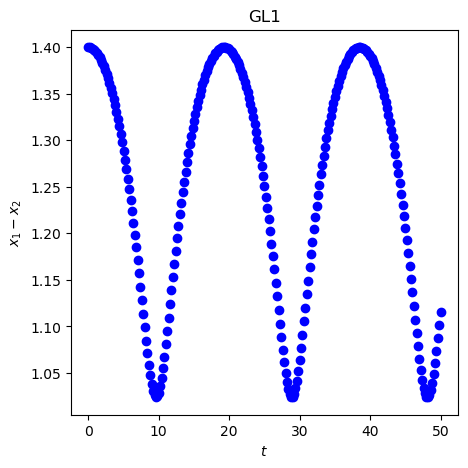

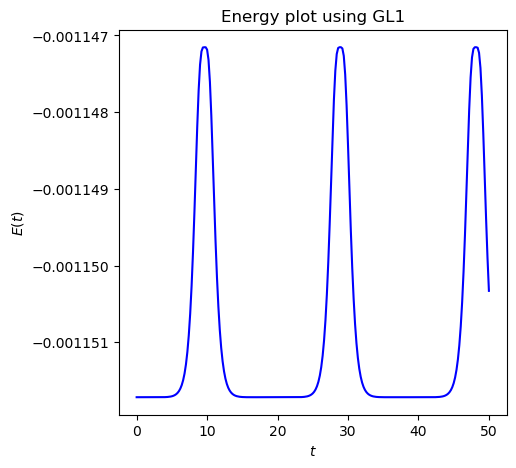

PyObject Text(0.5, 1, 'Energy plot using GL1')

In [88]:
using LinearAlgebra
#= Helper function: represents the Omega evaluation. =#
function omega(r)
   return 0.01 * ((1/(r^12)) - (1/(r^6)))
end
#= Helper function, returns the V evaluation at x
, which is a 2x1 vector. =#
function V(x)
   return omega(abs(x[1] - x[2])) 
end
#= Helper function: Takes in a 2x1 vector x and
returns a 2x1 vector representing the 
gradient of V with respect to a full vector x. =#
function nabla_x_Vx(x)
    x1 = x[1];
    x2 = x[2];
    nabla_Vx1 = (1/100) * ( (-12 * (x1 - x2) ^ (-13)) + ( 6 * (x1 - x2) ^ (-7) ) );
    nabla_Vx2 = (1/100) * ( (12 * (x1 - x2) ^ (-13)) - ( 6 * (x1 - x2) ^ (-7) ) );
    return [nabla_Vx1; nabla_Vx2]
end

#= helper function: represents the u' = F(u) righthand side.
returns 4x1. =#
function righthand(u)
    x = u[1:2]
    v = u[3:4]
    output = [v; -nabla_x_Vx(x)]
    return output
end

#= The 1 step Gauss Legendre procedure. N is discretization, 
T is final time, x0, v0 are initial conditions, maxIter is 
the max number of iteration allowed for implicit calculation.
Procedure returns the full trajectory of x, v and Vpot is 
the V evaluation at each step. =#
function gl1(N, T, x0, v0, maxIter)
    u = zeros(4, N+1)
    h = dt
    timesteps = t
    u0 = [x0; v0]
    u[:,1] = u0
    iter = 0
    for i in 1:N
        u_n = u[:,i]
        k1 = u_n 
        prev_k = [0.0;0.0;0.0;0.0]
        while norm(k1 - prev_k) >= 10^-10
            prev_k = k1
            k1 = righthand(u_n + 0.5 * h * k1)
            iter = iter + 1
        end
        u[:,i+1] = u_n + h * k1
    end
    x = u[1:2,:];
    v = u[3:4,:];
    Vpot = zeros(N+1);
    for i in 1:N+1
       Vpot[i] = V(x[:,i]) 
    end
    return x, v, Vpot
end

T = 50.0
dt = 0.2
N = round(Int64,T/dt)
t = collect(0:N)*dt
x0 = [0.7;-0.7]
v0 = [0.0;0.0]

x,v,Vpot = gl1(N,T,x0,v0,100)
using PyPlot
figure(1,figsize=(5,5))
st=1
plot(t,vec(x[1,:]-x[2,:]),"bo")
xlabel(L"t")
ylabel(L"x_1-x_2")
title("GL1")

Et = zeros(N+1)
Et = 0.5*vec(v[1,:].^2+v[2,:].^2) + Vpot
figure(2,figsize=(5,5))
st=1
plot(t,Et,"b-")
xlabel(L"t")
ylabel(L"E(t)")
title("Energy plot using GL1")

b) Do the same calculation using the Velocity-Verlet method, (and observe the ease of implementation compared to implicit methods).

We reconsider the problem using the Velocity-Verlet formulation:
\begin{equation}
    p_{n+\frac{1}{2}} = p_n - \frac{1}{2}h \nabla_q V(q_n)
\end{equation}
\begin{equation}
    q_{n+1} = q_n + h (\nabla_p T(p_{n+\frac{1}{2}})) \\
    p_{n+1} = p_{n+\frac{1}{2}} - \frac{1}{2}h \nabla_q V(q_{n+1})
\end{equation}

For the energy formulation, we have:
$$
E(t)=\frac12 (x_1'(t))^2 + \frac12 (x_2'(t))^ 2 + V(x_1(t),x_2(t)) \\
= V(x_1(t),x_2(t)) + \frac12 (x_1'(t))^2 + \frac12 (x_2'(t))^ 2
$$ which can be viewed as:
$$
E(t) = \mathbf{V}(x) + \mathbf{T}(v)
$$ where $v$ is the velocity and $x$ is the position. This results in a separable Hamiltonian system with:
$$
\dot{x} = \frac{\partial E(x, v)}{\partial v} = \frac{\partial \mathbf{T}(v)}{\partial v}\\
\dot{v} = - \frac{\partial E(x, v)}{\partial x} = -\frac{\partial \mathbf{V}(x)}{\partial x}
$$

We further our formulation by considering our case:
Here, 
$$
    \mathbf{T}(v) = \frac12v_1^2 + \frac12v_2^2
$$
Then we have $\nabla_{\mathbf{v}}T(\mathbf{v})$ as:
$$
    \nabla_{\mathbf{v}}\mathbf{T}(\mathbf{v}) =
    \begin{pmatrix}
        v_1 \\
        v_2
    \end{pmatrix}
$$ which is exactly what we have in our above scheme in (1).

And then:
$$
    \nabla_{\mathbf{x}}\mathbf{V}(x) = V(x_1, x_2) = 
    \begin{pmatrix}
        \nabla_{x_1} V(\mathbf{x}) \\
        \nabla_{x_2} V(\mathbf{x})
    \end{pmatrix}
$$

Using the separable $E(t)$, we have rebuilt the relation just as (1):
$$
\begin{pmatrix}
    \dot{x} \\
    \dot{v}
\end{pmatrix} =
\begin{pmatrix}
    v \\
    -\nabla_{\mathbf{x}}V(x)
\end{pmatrix}
$$

Therefore for our case, the velocity verlet method is: letting $p, q$ be $x, v$.
$$
x_{n+\frac12} = x_n - \frac12 h \nabla_{\mathbf{v}} \mathbf{T}(v_n) \\
v_{n+1} = v_n + h(\nabla_{\mathbf{x}} \mathbf{V}(x_{n+\frac12})) \\
x_{n+1} = x_{n+\frac12} -\frac12 h \nabla_{\mathbf{v}} \mathbf{T}(v_{n+1})
$$

In [85]:
using LinearAlgebra
####### set up some helper functions
#= helper function, returns the 2x1 vector representing
nabla_Tv. =#
function nabla_T(v)
    return [v[1];v[2]];
end

#= helper function, returns the 2x1 vector representing
nabla_Vx. This is the same as in (1). =#
function nabla_V(x)
    return nabla_x_Vx(x);
end

nabla_V (generic function with 1 method)

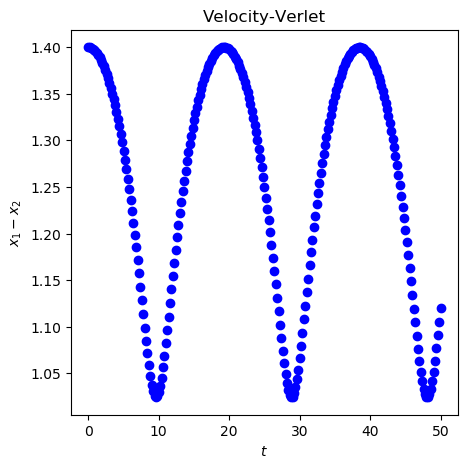

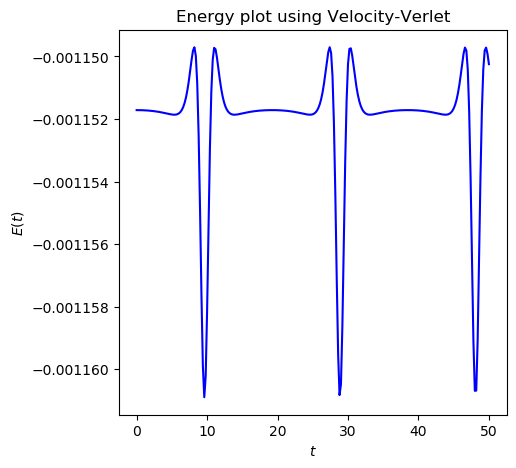

PyObject Text(0.5, 1, 'Energy plot using Velocity-Verlet')

In [87]:
#= Function representing a full velocity-verlet procedure
, returns x, v full trajectory, and Vpot which is the 
V(x1, x2) evaluation at each x. =#
function velocity_verlet(N, T, x0, v0)
    x = zeros(2,N+1)
    v = zeros(2,N+1)
    h = dt
    timesteps = t
    x[:,1]=x0; v[:,1]=v0;
    ###
    for i in 1:N
        x_n = x[:,i]; v_n = v[:,i];
        x_middle = x_n - 0.5 * h * nabla_T(v_n);
        v[:,i+1] = v_n + h * (nabla_V(x_middle));
        v_n_plus_1 = v[:,i+1]
        x[:,i+1] = x_middle - 0.5 * h * nabla_T(v_n_plus_1);
    end
    ###
    Vpot = zeros(N+1);
    for i in 1:N+1
       Vpot[i] = V(x[:,i]) 
    end
    return x, v, Vpot
end

########
# calculate using velocity verlet.
T = 50.0
dt = 0.2
N = round(Int64,T/dt)
t = collect(0:N)*dt
x0 = [0.7;-0.7]
v0 = [0.0;0.0]

x,v,Vpot = velocity_verlet(N,T,x0,v0)
using PyPlot
figure(1,figsize=(5,5))
st=1
plot(t,vec(x[1,:]-x[2,:]),"bo")
xlabel(L"t")
ylabel(L"x_1-x_2")
title("Velocity-Verlet")

Et = zeros(N+1)
Et = 0.5*vec(v[1,:].^2+v[2,:].^2) + Vpot
figure(2,figsize=(5,5))
st=1
plot(t,Et,"b-")
xlabel(L"t")
ylabel(L"E(t)")
title("Energy plot using Velocity-Verlet")